In [24]:
pip install jupyter-summarytools -q


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from summarytools import dfSummary
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Iris Dataset.data', header= None)

In [9]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
df = df.rename(columns={0: "sepal_length", 1: "sepal_width", 2:"petal_length", 3: "petal width", 4:"species"})

In [16]:
df

,sepal_length,sepal_width,petal_length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal width     0
species         0
dtype: int64

In [26]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,sepal_length[float64],Mean (sd) : 5.8 (0.8)min < med < max:4.3 < 5.8 < 7.9IQR (CV) : 1.3 (7.1),35 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dTYriQBiA4a/GVqJCggi68wIDs3DpIeawc4RZeAJv4E6QEDHTwZhkVg09je1PVTLWV/0++/wsXuRLUl1tmqYRwHffnn0DwD1enn0DXTHGDEVk4HCKU9M0r23dD9wEGaoxZjidTn/GcTyxPcfhcEiNMb+I1Q9BhioigziOJ6vV6jVJkuLRg7Msi9br9WS/3w9EhFA9EGqoIiKSJEkxm83+WB4+tL2u49jByHFB0KE+g+vYwchxGaG2z3rsYOT4HKF2xGHssB45QsZ7VKhAqFCBUKFCpzMqX4fQls5C5esQ2tTlLypfh9Cazl9PPevrEMLCwxRUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVGDhtGeqquqLSGyMsT1FkAt5CNUjeZ73y7L8sVgser1e7+H1ESLhLuQhVI+cTqeXKIpGy+WymM/n6aPHh7yQh1A9NB6PWcjzAaF+wmFWjOu67ndwS18aoV7gMiuWZRlVVfW9KIrfImL7q4gPCPUCl1lxu91ONpvN6Hw+97q6v6+IUK+wmRXTNA1yRnw2XvhDBa9/UXmgwRtvQ+WBBu95GyoPNHjP21Df8EADER6moAShQgVChQqEChUIFSoQKlQgVKhAqFCBUKHCzS9TDtubszAErbkaqsv25iwMQZtu/aJab2/OwhC06a5FKTbbm7MwBG3iYQoqECpUIFSo4P3CaTzGcZM1pw3WHP9T49VrE2pAXDdZc9lgzfU/Nd66NqEGxOXvzFrYYM36VeY91ybUANluslZVVSz2Y0Nc13U/SZLUcoO3q68zCRUi4j42dP0lklAhIu57s3b9JZJQ8Q/bsaHrL5G8R4UKhAoVCBUqECpUIFSoQKhQgVChAqFChbte+GdZFj164uPxGImI5Hke7Xa70f88Xuu1td636/H39PUXZ5y8xRUXT9kAAAAASUVORK5CYII="">",0(0.0%)
2,sepal_width[float64],Mean (sd) : 3.1 (0.4)min < med < max:2.0 < 3.0 < 4.4IQR (CV) : 0.5 (7.0),23 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACw0lEQVR4nO3dvY7aQBRA4TuwIPMjWwgFOpqUkVJQ8hB52DxCCp6AIk0qOiRkgXAWYWxSpIrCAp4Z78415+tHuDjCGI+vzeVyESB0rY8+AOARLx99AKEyxvREpGu5/HS5XF59Hs+zI9QrjDG98Xj8LY7jkc36/X6fGmO+E6s/hHpdN47j0WKxeE2S5Fhl4W63i5bL5Wi73XZFhFA9IdQbkiQ5TiaT3xZLe94P5slxMQUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFbgzVYOiKDoiEhtjbJazoeUKQvUsy7JOnudfZ7NZu91uV9onIMKGlrcQqmen0+kliqL+fD4/TqfTtMpaNrS8jVBrMhgM2NDiERdTUIFQoQKhQgVChQqEChUIFSoQKlQgVKjQ2D/8HQdIxGVZdnweD9w0MlTXARJ5nkdFUXw5Ho8/RMTm7hI8a2So4jBAQkRkvV6PVqtV/3w+t+s4OFQXdKgOp++4LMtOkiSpzf32NE253x6YYEN1OX1z6m6eYEMVh9M3p+7mCTlUEbGb/8Spu3n4HxUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChWC3ziNahwfEw92LDuhNojrY+Ihj2Un1Gaxfs4s9LHshBoYxzeqOD0mLgGPZSfUgLi+UaXJj4kTakBc3qgi0uzHxAk1QLZvVGnyY+K1hspEPfhSW6hM1INPdX6jMlEP3tT+G9VmJI9Is39voTru9UOFu9+orjNKLdYB/7kZKjNKEYp736jMKEUQHrqYYkbpc3DcZyDy95qntFx7c4shd6YgIu77DIqi6GRZ9nk4HP5qtVp51fX3thgSKkTE2z6DT/P5/GfV9Y9sMSRU/MN1n4HtermzxfChUHe7XVT1Uw+HQyQikmVZtNls+u+5Xutnaz1u1/WP9PUHQS+f8/4UpmMAAAAASUVORK5CYII="">",0(0.0%)
3,petal_length[float64],Mean (sd) : 3.8 (1.8)min < med < max:1.0 < 4.3 < 6.9IQR (CV) : 3.5 (2.1),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACp0lEQVR4nO3dTYriQBjG8afGD6JCRATdeYGBWbj0EHPYOcIsPIE3cCeIRMy0qNHZDQzT02pVYtdb/H/rrhjohyTvm6qKu91uAmL35bNPAHhE+94fOOd6krqexz/dbrc3z7HAHx8G1TnXG4/H3/M8H/kcfL/f75xzPwgrQt27onbzPB8tFou34XB4fObARVFky+VytN1uu5IIKoLcvfVL0nA4PE4mk18ex+95jAH+QTEFEwgqTCCoMIGgwgSCChMIKkwgqDCBoMIEggoTCCpMIKgw4aF3/XidwGmVUqJTKwlqREKnVUrpTq0kqHHxnlYppT21kqBGKGBapZTo1EqKKZjAFbUBAQVRfr1eO3WfTwoIas1CCqLz+ZxVVfX1eDz+lOR7608SQa2fd0G0Xq9Hq9Wqf7lcWk2dnFUEtSE+BdFut0uyEKoDxRRMIKgwgaDCBIIKEwgqTCCoMIGgwgSCChMIKkwgqDCBoMIE3vUnpqqqjqTcOeczPNr1VgQ1IWVZds7n87fZbNZqtVpPL2WJeb0VQU3I6XRqZ1nWn8/nx+l0untmbOzrrQhqggaDQXJb2VNMwQSCChMIKkwgqDCBoMKERqv+wOazFHEDGq/VWFBDm89S3A1ovFZjQQ1pPkvxN6DxWo03/AOaz1LEDegUxfyoxpspSIr/UY2gQlL8j2oEFX+J9VGNPipMIKgwgVv/f7AZb1wI6jvYjDc+BPV9bMYbGYL6ATbjjQfFFEzgioraNLlUm6CiFk0v1SaoqEXTS7UJKmrV1FLtZIMa+DlxmvaRSTKooZ8Tp2kfnySDqsDPidO0j0+qQZXk/zlxmvbxoeEPEx66ohZFkT174MPhkElSWZbZZrPpPzu+KIqsqqq2/BrI+fV6bfuctxR27p811vJvP/J/+g3LcowOEmBq9gAAAABJRU5ErkJggg=="">",0(0.0%)
4,petal width[float64],Mean (sd) : 1.2 (0.8)min < med < max:0.1 < 1.3 < 2.5IQ

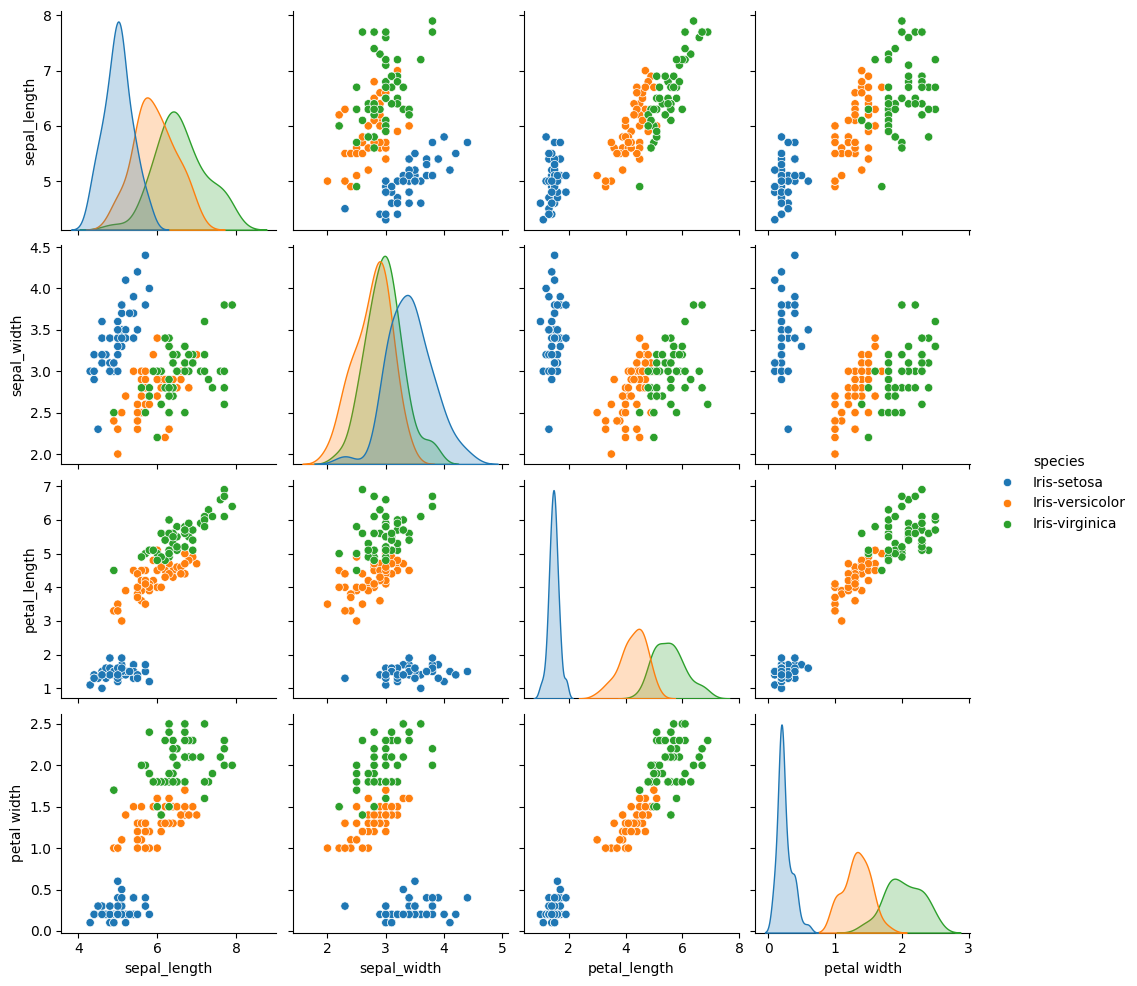

In [28]:
sns.pairplot(df, hue= 'species')

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [56]:
target = 'species'
X= df.drop(target, axis=1)
y= df[target]

In [57]:
model = LogisticRegression()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=667)

In [69]:
model.fit(X_train,y_train)

LogisticRegression()

In [70]:
y_pred = model.predict(X_test)

In [71]:
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [72]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [75]:
cross_val_score(model, X= X, y= y, cv=5).mean()

/Users/lorenzo/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

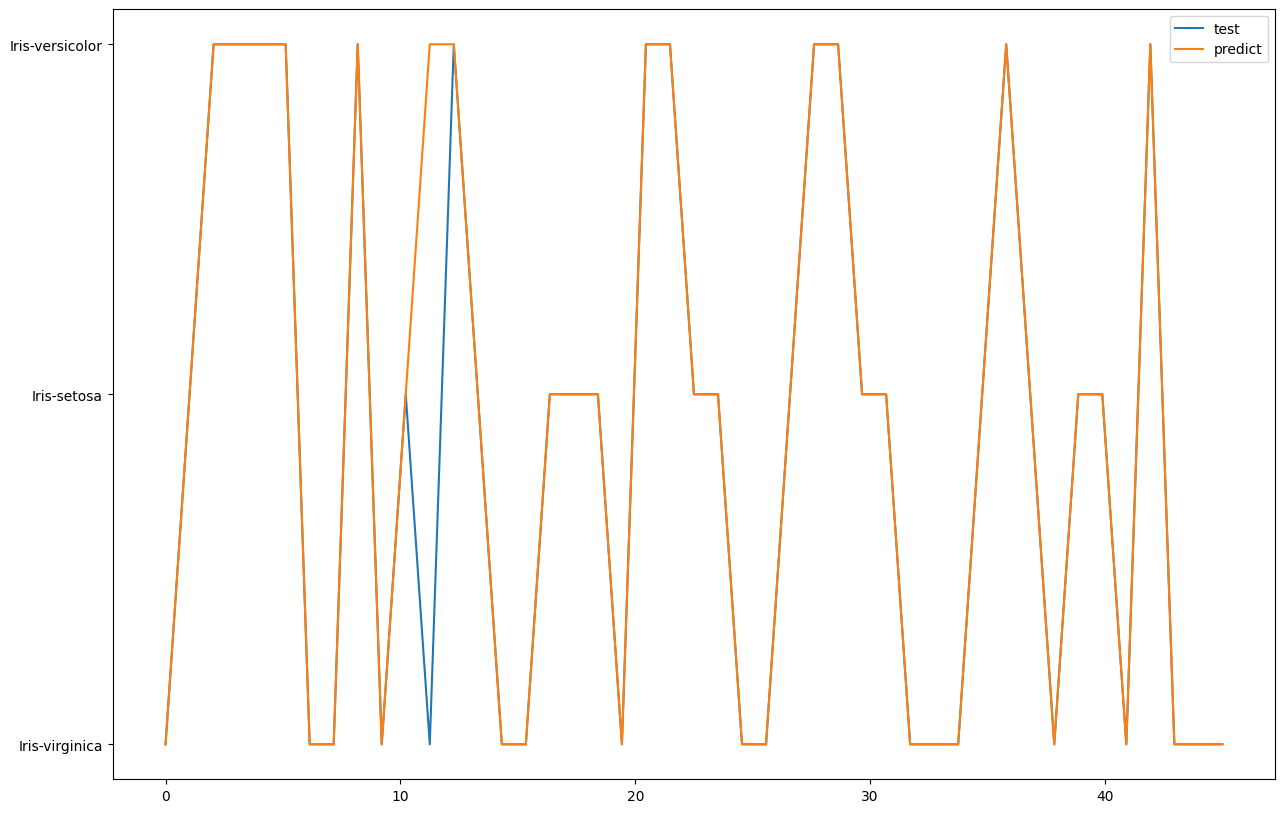

In [83]:
length = len(y_pred)
x = np.linspace(0,length,length)

plt.figure(figsize=(15,10))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predict')
plt.legend(loc='upper right')